In [1]:
import Pkg

In [220]:
Pkg.add.(["HTTP", "Plots", "DataFrames", "HDF5","DrWatson", "StatsBase"])

6-element Vector{Nothing}:
 nothing
 nothing
 nothing
 nothing
 nothing
 nothing

In [5]:
using HTTP
using Plots
using DataFrames
using HDF5
using DrWatson

In [28]:
using Glob
using CSV

In [221]:
using Statistics
using StatsBase

In [7]:
@quickactivate "JPetalo"

In [8]:
pwd()

"/Users/jj/JuliaProjects/JPetalo/notebooks"

In [9]:
datadir()

"/Users/jj/JuliaProjects/JPetalo/data"

In [10]:
srcdir()

"/Users/jj/JuliaProjects/JPetalo/src"

In [353]:
include(srcdir("jpetalo.jl"))

Main.JPetalo

In [94]:
function rxy(X,Y)
    return sqrt.(X.^2 + Y.^2)
end

rxy (generic function with 1 method)

In [195]:
function phi(X,Y)
    return atan.(Y,X)
end

phi (generic function with 1 method)

In [274]:
function qres(n3df, qmin=7000.0, qmax=12000.0)
    Q1 = n3df.q1[n3df.q1 .<qmax]
    Q  = Q1[Q1 .>qmin];
    return mean(Q), std(Q), std(Q) / mean(Q)
end

qres (generic function with 3 methods)

In [284]:
function n3plt(n3df)
    
    et1 = histogram(n3df.et1, legend=false)
    xlabel!("Gamma 1 energy (keV)")
    ylabel!("Arbitrary units")
    
    et2 = histogram(n3df.et2, legend=false)
    xlabel!("Gamma 2 energy (keV)")
    ylabel!("Arbitrary units")

 
    nsipm = histogram(n3df.nsipm, bins=30, legend=false)
    xlabel!("Number of SiPMs with Q > qc pes")
    ylabel!("Arbitrary units")
    
    qmx = histogram(n3df.qmx, xlim=(0.,500.),  legend=false)
    xlabel!("max Q in SiPMs (pes)")
    ylabel!("Arbitrary units")
 
    qav = histogram(n3df.qav, xlim=(0.,100.),  legend=false)
    xlabel!("average Q in SiPMs (pes)")
    ylabel!("Arbitrary units")
 
    q1 = histogram(n3df.q1, legend=false)
    xlabel!("Total Q in SiPMs (pes)")
    ylabel!("Arbitrary units")
 
    q12 = histogram2d(n3df.q1, n3df.q2, c = :blues, legend=false)
    xlabel!("Total Q in SiPMs (pes) hemisphere 1")
    ylabel!("Total Q in SiPMs (pes) hemisphere 2")
 
    dxy = histogram(rxy(n3df.dx,n3df.dy), legend=false)
    xlabel!("Dxy (mm)")
    ylabel!("Arbitrary units")

    phxy = histogram(phi(n3df.dy,n3df.dx), legend=false)
    xlabel!("Phi (mm)")
    ylabel!("Arbitrary units")

    dz = histogram(n3df.dz, legend=false)
    xlabel!("Dz (mm)")
    ylabel!("Arbitrary units")
    
    n3pd = Dict("nsipm"=>nsipm, "qmx"=>qmx, "qav"=>qav, "q1"=>q1, "q12"=>q12, 
        "dxy"=>dxy, "phxy"=>phxy, "dz"=>dz, "et1"=>et1, "et2"=>et2)
    return n3pd
end

n3plt (generic function with 1 method)

In [12]:
path = datadir("nema3-vac-1m/nema3-vac-1m-0.h5")

"/Users/jj/JuliaProjects/JPetalo/data/nema3-vac-1m/nema3-vac-1m-0.h5"

In [13]:
fid = h5open(path, "r") 

🗂️ HDF5.File: (read-only) /Users/jj/JuliaProjects/JPetalo/data/nema3-vac-1m/nema3-vac-1m-0.h5
└─ 📂 MC
   ├─ 🔢 configuration
   ├─ 🔢 hits
   ├─ 🔢 primaries
   ├─ 🔢 process_names
   ├─ 🔢 sensor_xyz
   ├─ 🔢 total_charge
   ├─ 🔢 vertices
   ├─ 🔢 volume_names
   └─ 🔢 waveform

In [14]:
pdf = JPetalo.read_abc(path);

In [16]:
psipm_xy = scatter(pdf.sensor_xyz.x, pdf.sensor_xyz.y, 
                   title = "XY positions SiPMs", leg=false, fmt = :png);
xlabel!("x (mm)");
ylabel!("y (mm)");

In [17]:
psipm_xz = scatter(pdf.sensor_xyz.x, pdf.sensor_xyz.z, 
    title = "XZ positions SiPMs", leg=false, fmt = :png);
xlabel!("x (mm)");
ylabel!("z (mm)");

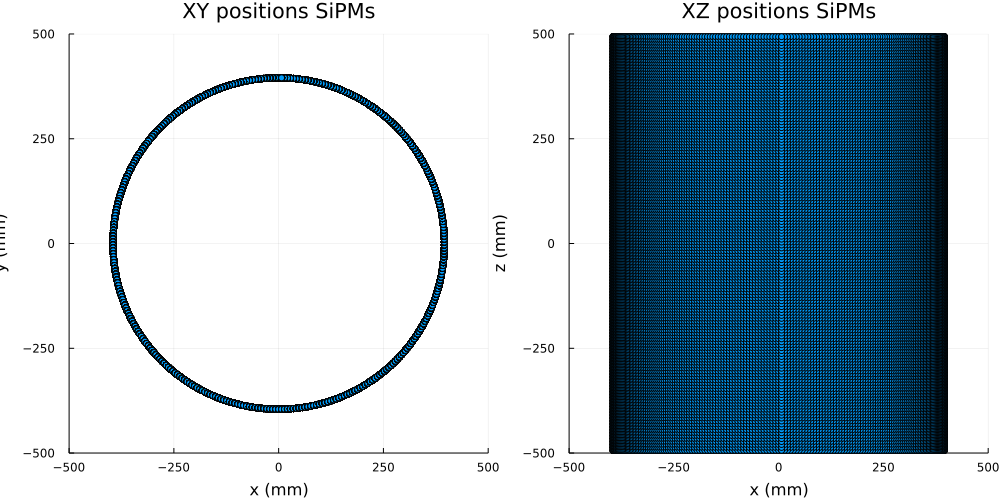

In [24]:
plot(psipm_xy,psipm_xz, layout = (1, 2), aspect_ratio=:equal, xlim=(-500.0, 500.0), 
		ylim=(-500.0, 500.0), size = (1000, 500), legend=false, fmt = :png)

### Position of sources

In [21]:
	p_xy = scatter(pdf.primaries.x, pdf.primaries.y, title = "XY primary ", 	
		               leg=false, fmt = :png);
	p_xz = scatter(pdf.primaries.x, pdf.primaries.z, title = "XZ primary ", 
		               leg=false, fmt = :png);
	p_yz = scatter(pdf.primaries.y, pdf.primaries.z, title = "YZ primary ", 
		               leg=false, fmt = :png);


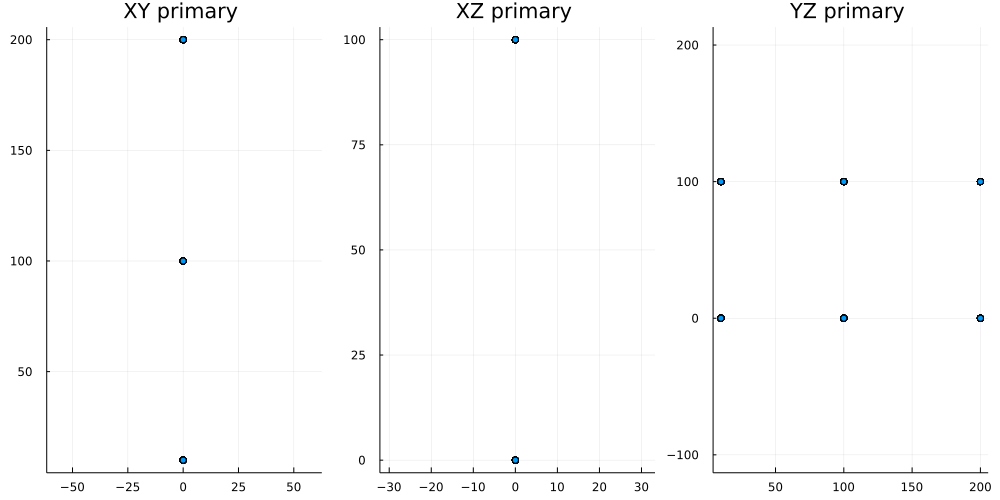

In [23]:
plot(p_xy,p_xz, p_yz, layout = (1, 3), 
    aspect_ratio=:equal,size = (1000, 500), legend=false, fmt = :png)


In [291]:
vlxe      = JPetalo.select_by_column_value(pdf.vertices, "volume_id", 0);

In [293]:
vlxep = JPetalo.select_by_column_value(vlxe, "parent_id", 0);

In [294]:
show(vlxep, allcols=true) 

12094×13 DataFrame
   Row │ event_id  track_id  parent_id  x          y          z           t         moved       pre_KE   post_KE  deposited  process_id  volume_id 
       │ Int64     Int64     Int64      Float32    Float32    Float32     Float32   Float32     Float32  Float32  Float32    Int64       Int64     
───────┼───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     1 │        0         2          0  -329.725   -138.272    159.639    1.37147    1.60207    511.0    511.0      0.0               2          0
     2 │        0         2          0  -341.491   -146.734    161.665    1.42028   14.6337     511.0    202.182    0.67752           0          0
     3 │        0         2          0  -328.042   -151.718    150.513    1.48088   18.1678     202.182    0.0      4.7747            1          0
     4 │        0         1          0   260.333    288.127     52.9122   1.08284   33.4672     

In [309]:
event = 1
vdf = JPetalo.select_by_column_value(vlxep, "event_id", event)
show(vdf, allcols=true) 

2×13 DataFrame
 Row │ event_id  track_id  parent_id  x         y        z        t        moved     pre_KE   post_KE  deposited  process_id  volume_id 
     │ Int64     Int64     Int64      Float32   Float32  Float32  Float32  Float32   Float32  Float32  Float32    Int64       Int64     
─────┼──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │        1         2          0  -90.0749  357.611  126.612  1.27008  13.5522     511.0    511.0     0.0              2          0
   2 │        1         2          0  -91.1156  361.526  127.991  1.28435   4.27901    511.0      0.0     4.7747           1          0

In [310]:
vdf.track_id

2-element Vector{Int64}:
 2
 2

In [311]:
if 1 in vdf.track_id && 2 in vdf.track_id
    println("bingo")
end

In [308]:
any(vdf.track_id .== 1) && any(vdf.track_id .== 2)

true

In [ ]:
ecut = 2

In [464]:
function select(first, last, vlxep, ecut=2, eg1cut=100, eg2cut=100, maxscat=10)
    for event in first:last
        vdf = JPetalo.select_by_column_value(vlxep, "event_id", event)
        if any(vdf.track_id .== 1) && any(vdf.track_id .== 2)
            if nrow(vdf) < maxscat
                df1 = JPetalo.select_by_column_value(vdf, "track_id", 1)
                df2 = JPetalo.select_by_column_value(vdf, "track_id", 2)
                
                eg1 = df1.pre_KE[1] - df1.post_KE[1]
                eg2 = df2.pre_KE[1] - df2.post_KE[1]
                
                if eg1 > eg1cut && eg2 > eg2cut
                    hitdf  = JPetalo.reco_hits(event, ecut, pdf.total_charge, pdf.sensor_xyz)
                    return event, vdf, df1, df2, hitdf
                end
            end
        else
            continue
        end
    end
    return 0 
end

select (generic function with 5 methods)

In [465]:
event, vdf, df1, df2, hitdf = select(0, 1000, vlxep, ecut);

In [466]:
show(vdf, allcols=true) 

4×13 DataFrame
 Row │ event_id  track_id  parent_id  x         y         z         t        moved      pre_KE   post_KE  deposited  process_id  volume_id 
     │ Int64     Int64     Int64      Float32   Float32   Float32   Float32  Float32    Float32  Float32  Float32    Int64       Int64     
─────┼─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │        5         2          0  -219.29   -281.138   123.531  1.28372   0.579001  511.0      0.0     34.556             1          0
   2 │        5         1          0   212.799   292.52   -119.875  1.24572   6.05495   511.0    329.715    0.01096           0          0
   3 │        5         1          0   233.596   287.721  -124.469  1.31855  21.8322    329.715  296.529    0.06778           0          0
   4 │        5         1          0   237.317   288.252  -127.896  1.33551   5.08637   296.529    0.0      0.9895            1          0

In [467]:
show(df1, allcols=true) 

3×13 DataFrame
 Row │ event_id  track_id  parent_id  x        y        z         t        moved     pre_KE   post_KE  deposited  process_id  volume_id 
     │ Int64     Int64     Int64      Float32  Float32  Float32   Float32  Float32   Float32  Float32  Float32    Int64       Int64     
─────┼──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │        5         1          0  212.799  292.52   -119.875  1.24572   6.05495  511.0    329.715    0.01096           0          0
   2 │        5         1          0  233.596  287.721  -124.469  1.31855  21.8322   329.715  296.529    0.06778           0          0
   3 │        5         1          0  237.317  288.252  -127.896  1.33551   5.08637  296.529    0.0      0.9895            1          0

In [468]:
show(df2, allcols=true) 

1×13 DataFrame
 Row │ event_id  track_id  parent_id  x        y         z        t        moved     pre_KE   post_KE  deposited  process_id  volume_id 
     │ Int64     Int64     Int64      Float32  Float32   Float32  Float32  Float32   Float32  Float32  Float32    Int64       Int64     
─────┼──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │        5         2          0  -219.29  -281.138  123.531  1.28372  0.579001    511.0      0.0     34.556           1          0

In [469]:
show(hitdf, allcols=true) 

1653×4 DataFrame
  Row │ x          y         z        q     
      │ Float32    Float32   Float32  Int64 
──────┼─────────────────────────────────────
    1 │    0.0      395.4     -185.5      3
    2 │ -361.501   -160.182    122.5      3
    3 │ -358.601   -166.573     66.5      3
    4 │ -355.588   -172.911    115.5      3
    5 │ -355.588   -172.911    143.5      3
    6 │ -355.588   -172.911    164.5      3
    7 │ -352.463   -179.195    108.5      3
    8 │ -349.227   -185.422     31.5      3
    9 │ -349.227   -185.422    206.5      3
   10 │ -345.881   -191.591     87.5      4
   11 │ -345.881   -191.591     94.5      4
  ⋮   │     ⋮         ⋮         ⋮       ⋮
 1644 │   69.8121   389.188   -241.5      3
 1645 │   69.8121   389.188   -178.5      3
 1646 │   69.8121   389.188    -59.5      3
 1647 │   62.8937   390.366   -150.5      4
 1648 │   62.8937   390.366     38.5      3
 1649 │   55.9555   391.421   -115.5      3
 1650 │   42.0284   393.16     -10.5      3
 1651 │   35.0

In [470]:
println(" event = ", event)
                println(" eg1 = ", df1.pre_KE[1] - df1.post_KE[1])
                println(" eg2 = ", df2.pre_KE[1] - df2.post_KE[1])

 event = 5
 eg1 = 181.28516
 eg2 = 511.0


In [471]:
pxyq, pxy, pxz, pyz = JPetalo.plot_xyzq(hitdf, 25.0)

(Plot{Plots.GRBackend() n=1}, Plot{Plots.GRBackend() n=1}, Plot{Plots.GRBackend() n=1}, Plot{Plots.GRBackend() n=1})

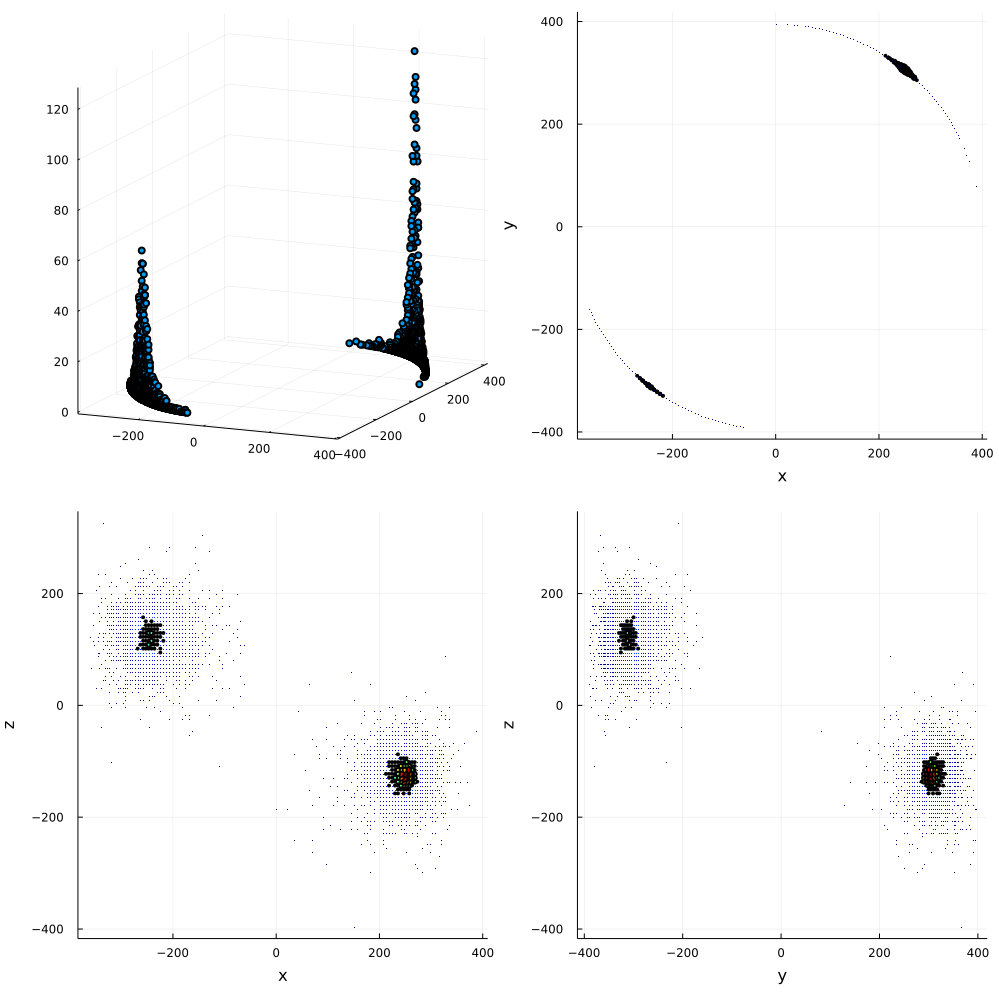

In [472]:
plot(pxyq, pxy, pxz, pyz,  layout = (2, 2), size = (1000, 1000), 
     legend=false, fmt = :png)

In [473]:
event, vdf, df1, df2, hitdf = select(6, 1000, vlxep, ecut);

In [474]:
show(vdf, allcols=true) 

4×13 DataFrame
 Row │ event_id  track_id  parent_id  x         y         z         t         moved     pre_KE   post_KE  deposited  process_id  volume_id 
     │ Int64     Int64     Int64      Float32   Float32   Float32   Float32   Float32   Float32  Float32  Float32    Int64       Int64     
─────┼─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │       10         2          0  -217.971  288.37     29.0339  0.819489   6.68755  511.0    173.591    0.14798           0          0
   2 │       10         2          0  -216.338  287.997    29.0921  0.825081   1.67661  173.591    0.0      4.7747            1          0
   3 │       10         1          0   363.858   52.4837  218.463   1.36797   14.1381   511.0    312.479    5.4169            0          0
   4 │       10         1          0   368.844   59.1289  221.898   1.39795    8.98968  312.479    0.0      4.7747            1          0

In [475]:
println(" event = ", event)
                println(" eg1 = ", df1.pre_KE[1] - df1.post_KE[1])
                println(" eg2 = ", df2.pre_KE[1] - df2.post_KE[1])

 event = 10
 eg1 = 198.52145
 eg2 = 337.40924


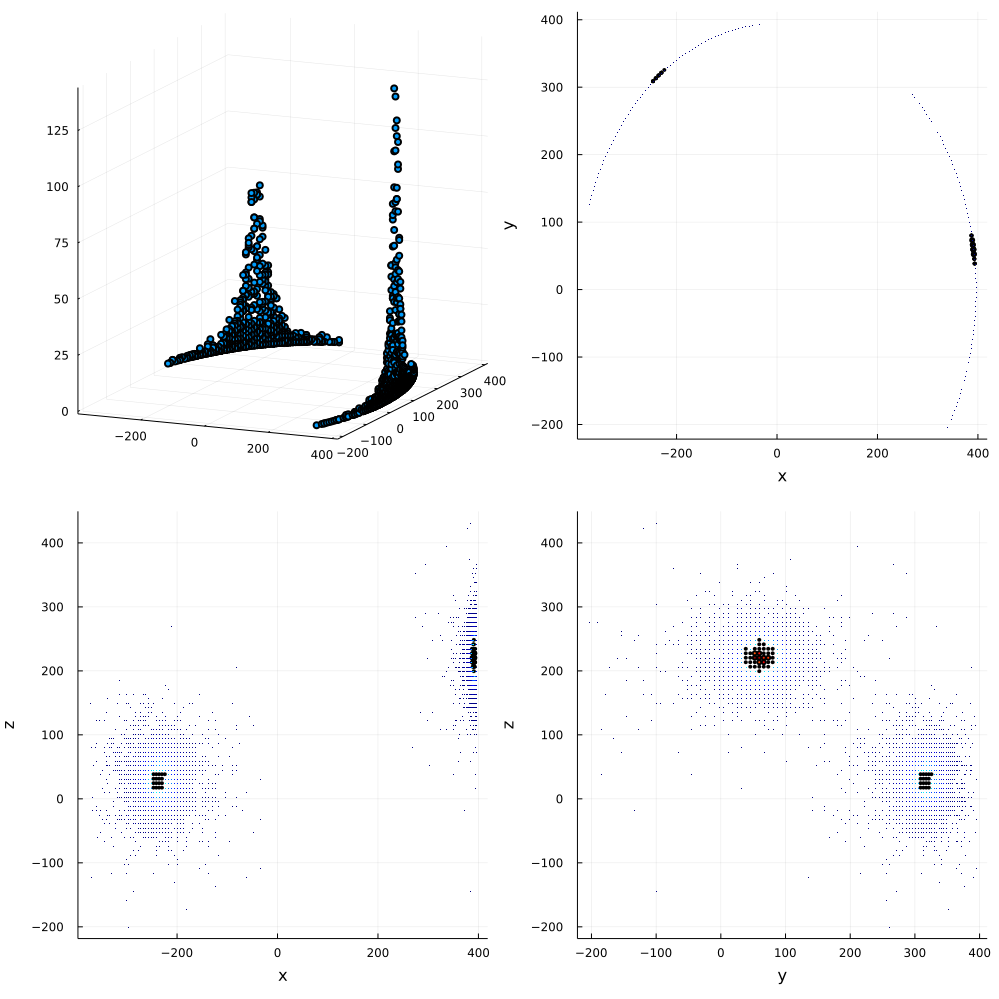

In [476]:
pxyq, pxy, pxz, pyz = JPetalo.plot_xyzq(hitdf, 50.0)
plot(pxyq, pxy, pxz, pyz,  layout = (2, 2), size = (1000, 1000), 
     legend=false, fmt = :png)

In [477]:
event, vdf, df1, df2, hitdf = select(11, 1000, vlxep, ecut);
show(vdf, allcols=true) 

3×13 DataFrame
 Row │ event_id  track_id  parent_id  x         y         z         t        moved     pre_KE   post_KE  deposited  process_id  volume_id 
     │ Int64     Int64     Int64      Float32   Float32   Float32   Float32  Float32   Float32  Float32  Float32    Int64       Int64     
─────┼────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │       15         2          0  -260.453  -250.923  -38.973   1.31422   6.04995  511.0    258.623    0.20837           0          0
   2 │       15         2          0  -264.063  -248.376  -37.3232  1.32995   4.71593  258.623    0.0      0.9266            1          0
   3 │       15         1          0   254.019   264.478  235.54    1.28175  11.445    511.0      0.0      4.7747            1          0

In [478]:
println(" event = ", event)
                println(" eg1 = ", df1.pre_KE[1] - df1.post_KE[1])
                println(" eg2 = ", df2.pre_KE[1] - df2.post_KE[1])

 event = 15
 eg1 = 511.0
 eg2 = 252.37704


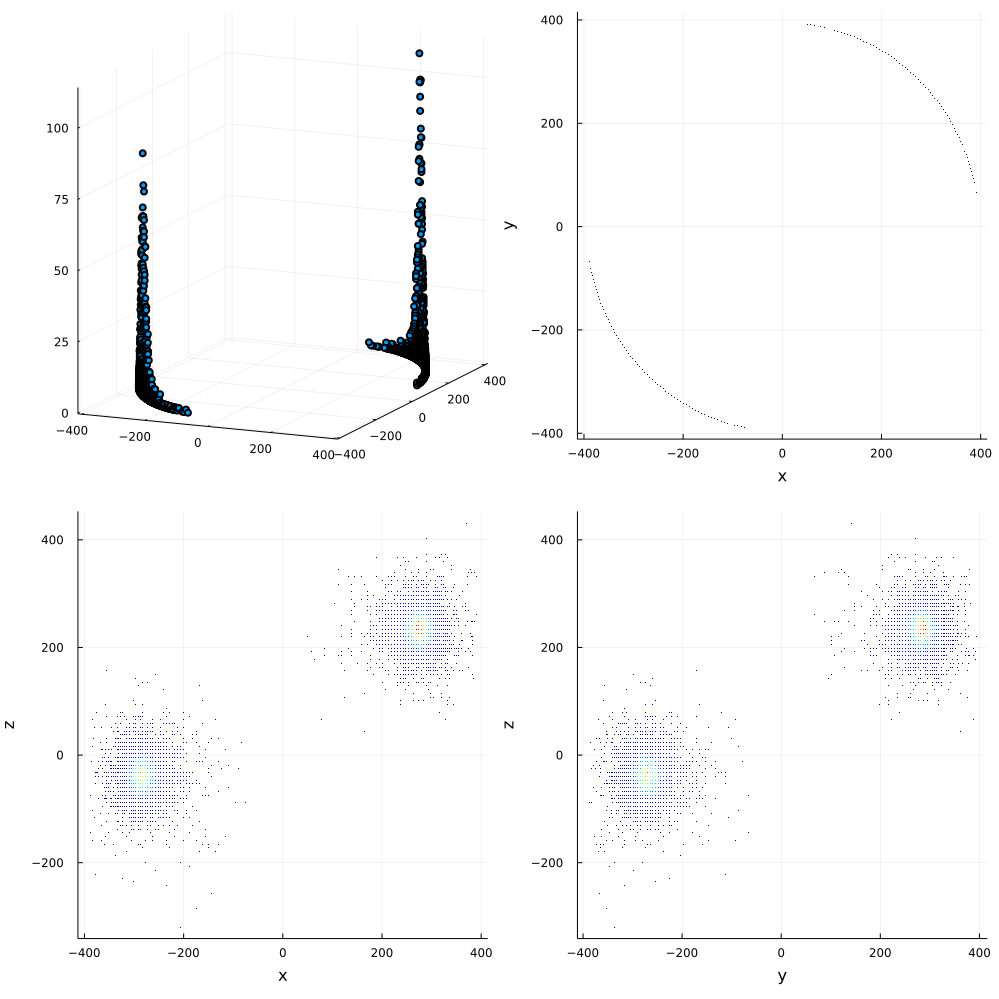

In [479]:
pxyq, pxy, pxz, pyz = JPetalo.plot_xyzq(hitdf, 100.0)
plot(pxyq, pxy, pxz, pyz,  layout = (2, 2), size = (1000, 1000), 
     legend=false, fmt = :png)

In [480]:
event, vdf, df1, df2, hitdf = select(16, 1000, vlxep, ecut);
show(vdf, allcols=true) 

5×13 DataFrame
 Row │ event_id  track_id  parent_id  x         y         z         t         moved      pre_KE   post_KE  deposited  process_id  volume_id 
     │ Int64     Int64     Int64      Float32   Float32   Float32   Float32   Float32    Float32  Float32  Float32    Int64       Int64     
─────┼──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │       26         2          0  -105.149   356.218   250.17   0.803408  20.7146    511.0    362.256    0.67752           0          0
   2 │       26         2          0  -101.138   361.789   256.765  0.835161   9.51922   362.256    0.0      4.7747            1          0
   3 │       26         1          0   300.141  -245.913  -328.652  2.29327   42.9366    511.0    361.912    0.01096           0          0
   4 │       26         1          0   301.737  -243.655  -353.174  2.37559   24.6774    361.912  136.15     0.67752           0          0
  

 event = 26
 eg1 = 149.08841
 eg2 = 148.74414


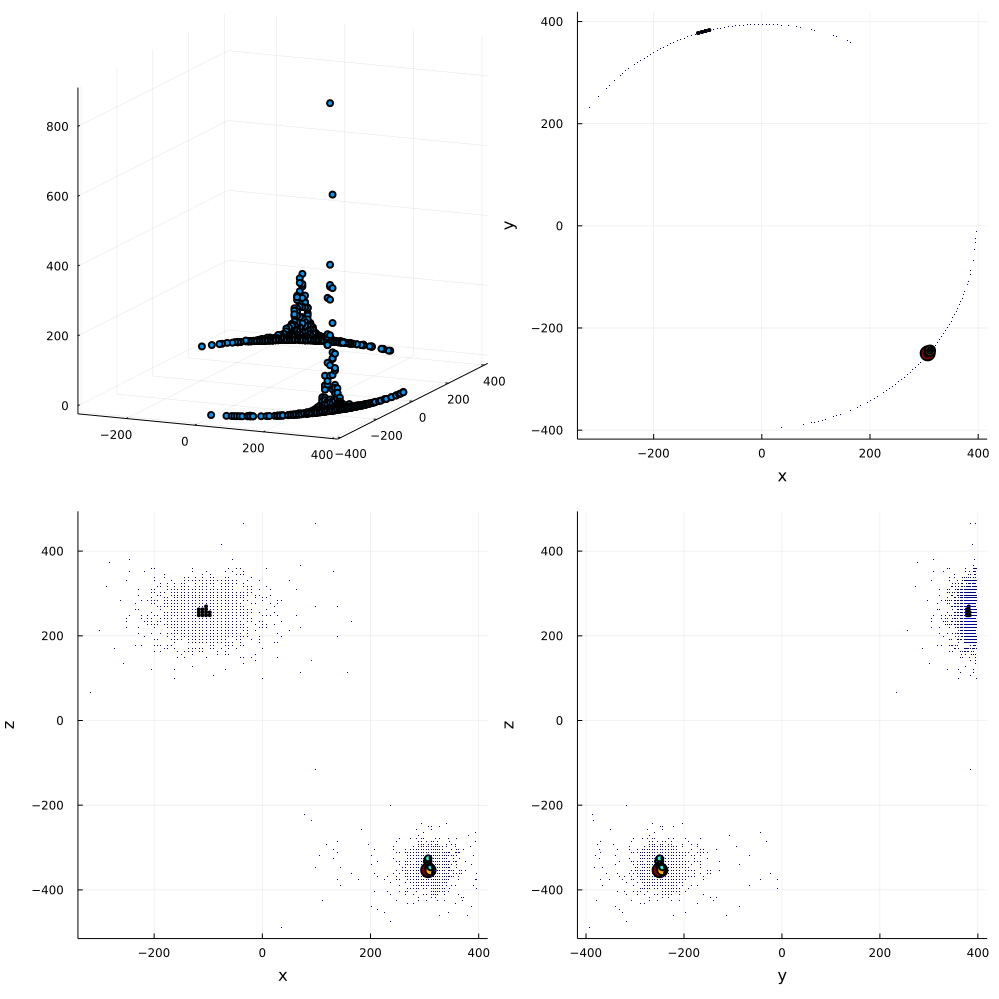

In [481]:
println(" event = ", event)
                println(" eg1 = ", df1.pre_KE[1] - df1.post_KE[1])
                println(" eg2 = ", df2.pre_KE[1] - df2.post_KE[1])
pxyq, pxy, pxz, pyz = JPetalo.plot_xyzq(hitdf, 100.0)
plot(pxyq, pxy, pxz, pyz,  layout = (2, 2), size = (1000, 1000), 
     legend=false, fmt = :png)

## NEMA

In [254]:
drx = datadir("nema3df")
input = string(drx,"/nema3df_f5_q2.csv")

"/Users/jj/JuliaProjects/JPetalo/data/nema3df/nema3df_f5_q2.csv"

In [255]:
n3df = DataFrame(CSV.File(input));

In [256]:
names(n3df)

24-element Vector{String}:
 "dx"
 "dy"
 "dz"
 "et1"
 "et2"
 "nsipm"
 "phistd"
 "q1"
 "q2"
 "qav"
 "qmx"
 "r"
 "xr1"
 "xr2"
 "xt1"
 "xt2"
 "yr1"
 "yr2"
 "yt1"
 "yt2"
 "zr1"
 "zr2"
 "zt1"
 "zt2"

In [285]:
n3pd = n3plt(n3df);

In [275]:
qmean, qstd, sigma_over_mean = qres(n3df, 7000.0, 12000.0)

(9497.381491604841, 738.5160990936254, 0.07775996991870156)

In [286]:
keys(n3pd)

KeySet for a Dict{String, Plots.Plot{Plots.GRBackend}} with 10 entries. Keys:
  "q1"
  "nsipm"
  "qmx"
  "qav"
  "dz"
  "phxy"
  "q12"
  "dxy"
  "et1"
  "et2"

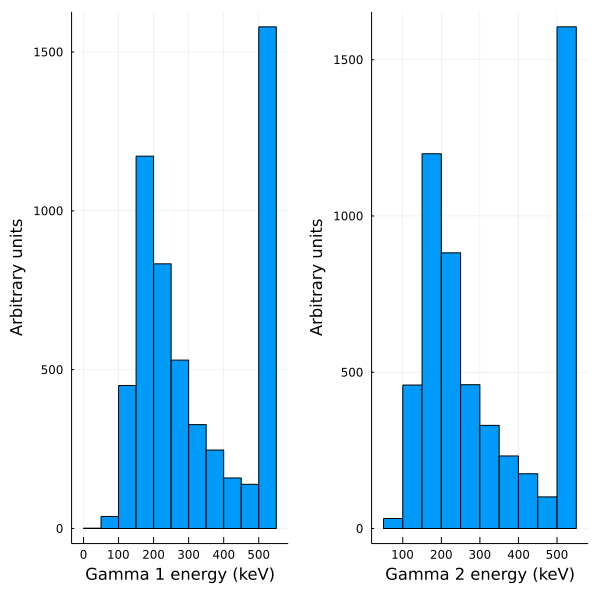

In [287]:
plot(n3pd["et1"], n3pd["et2"],  layout = (1, 2), size = (600, 600), 
     legend=false, fmt = :png)

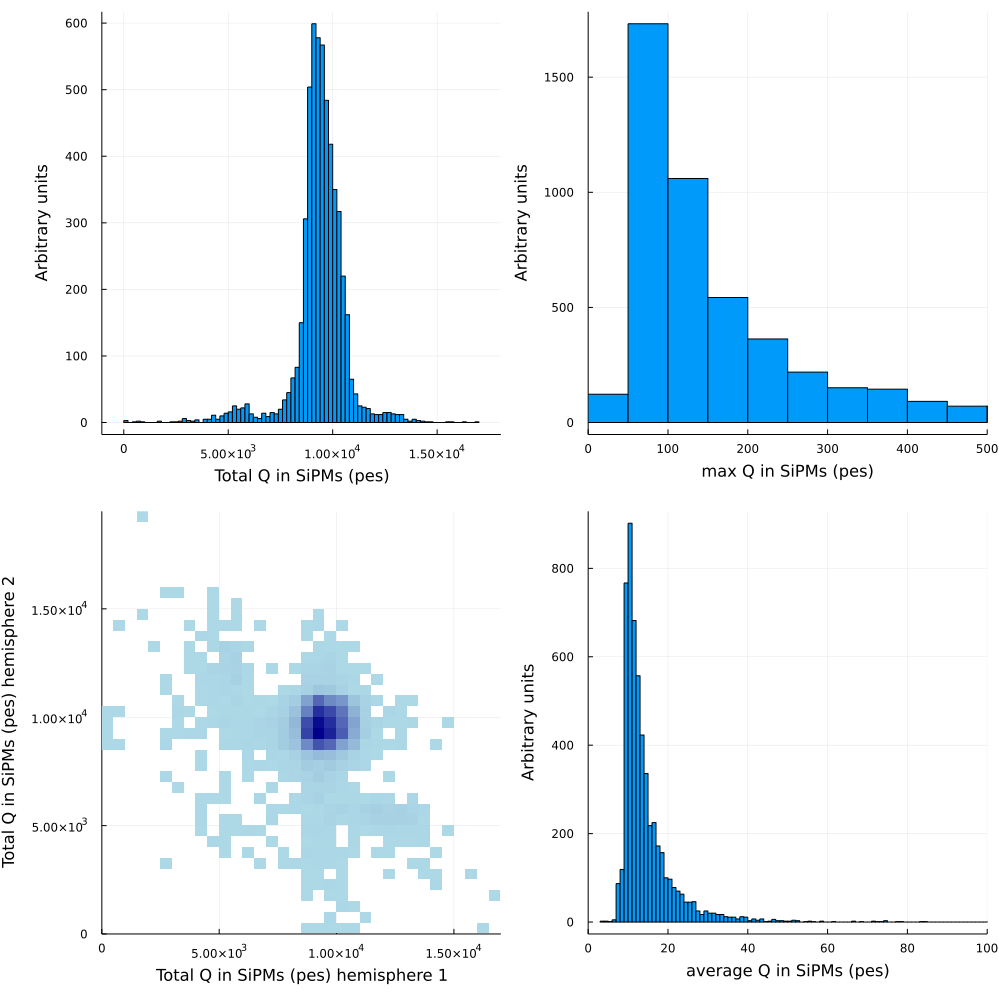

In [269]:
plot(n3pd["q1"], n3pd["qmx"], n3pd["q12"], n3pd["qav"],  layout = (2, 2), size = (1000, 1000), 
     legend=false, fmt = :png)

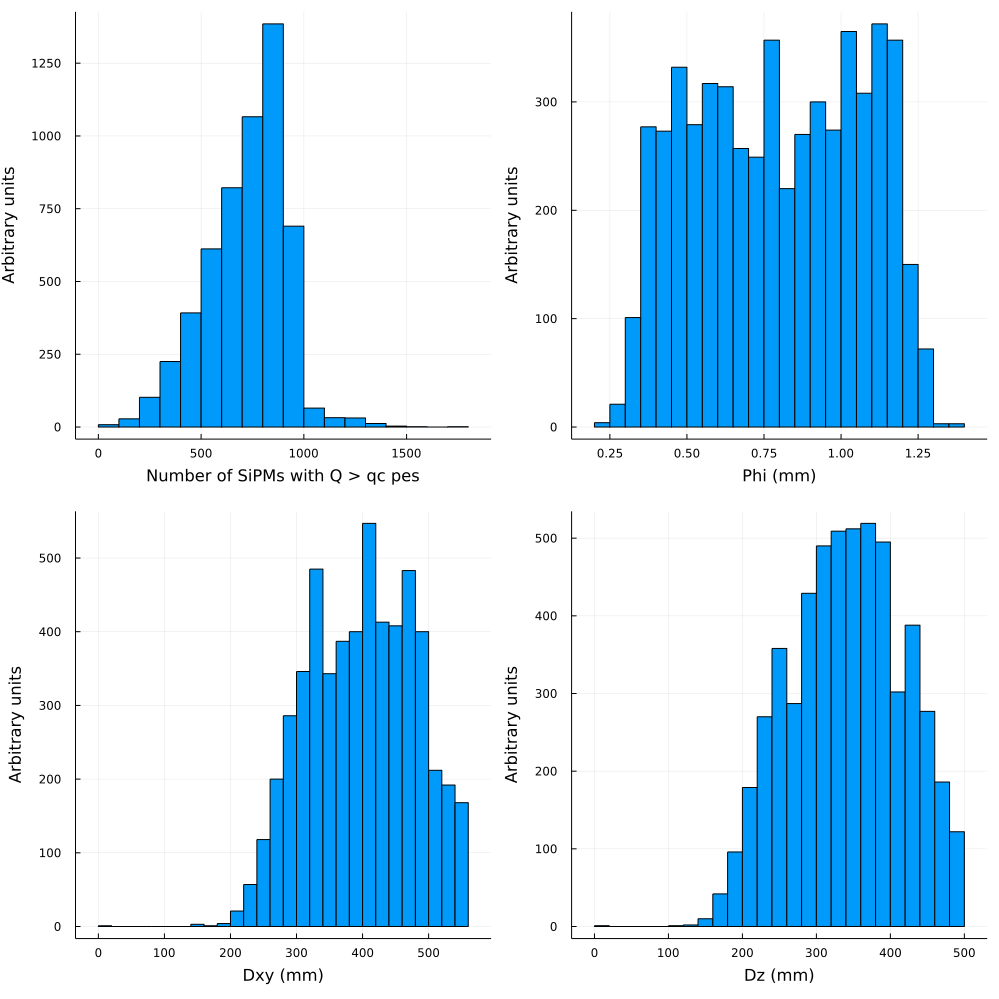

In [270]:
plot(n3pd["nsipm"], n3pd["phxy"], n3pd["dxy"], n3pd["dz"],  layout = (2, 2), size = (1000, 1000), 
     legend=false, fmt = :png)

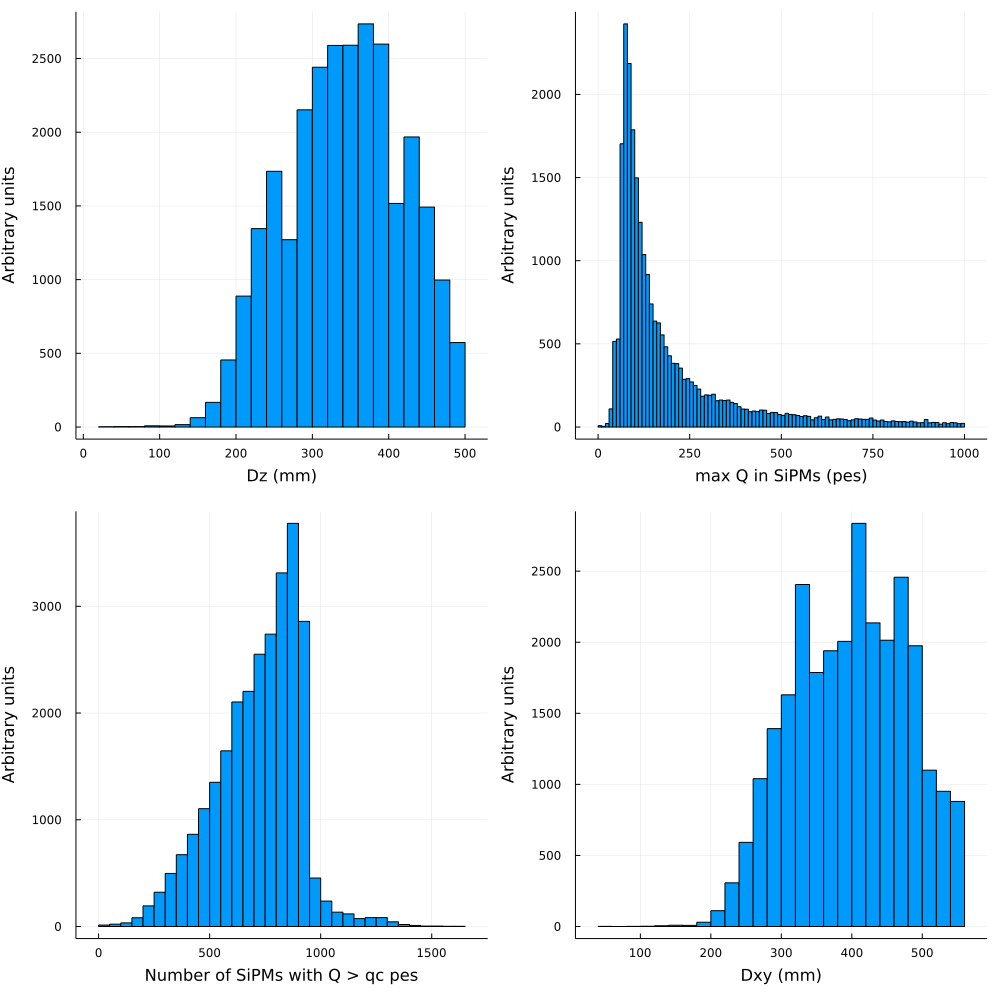

In [182]:
plot([n3pd[k] for k in keys(n3pd)]..., layout = (2, 2), size = (1000, 1000), 
     legend=false, fmt = :png)

In [198]:
mean(n3df.nsipm1)

721.804533603708

In [199]:
std(n3df.nsipm1)

191.1534200983487

In [200]:
a = [1.,2.,3.,4.]
b = [10.,20.,30.,40.]
x = 1.

1.0

In [202]:
sum( (a.-x).^2 .* b)

500.0

In [203]:
xsum = 0
for i in 1:4
    xsum += (a[i] - x)^2 * b[i]
end

In [204]:
xsum

500.0

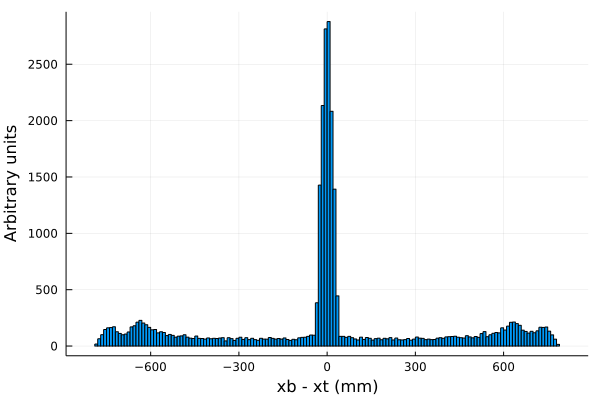

In [176]:
histogram(n3df.xb1 - n3df.xt1, legend=false)
xlabel!("xb - xt (mm)")
ylabel!("Arbitrary units")

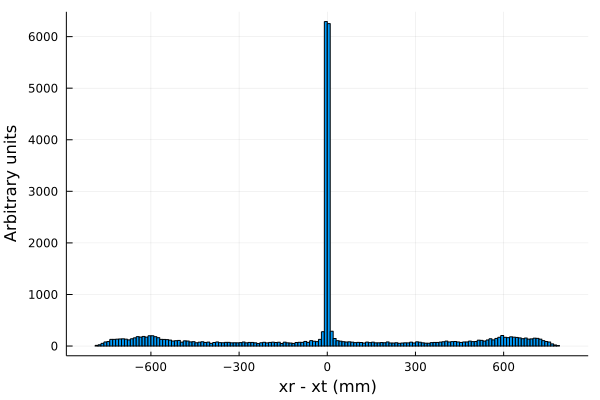

In [183]:
histogram(n3df.xr1 - n3df.xt1, legend=false)
xlabel!("xr - xt (mm)")
ylabel!("Arbitrary units")

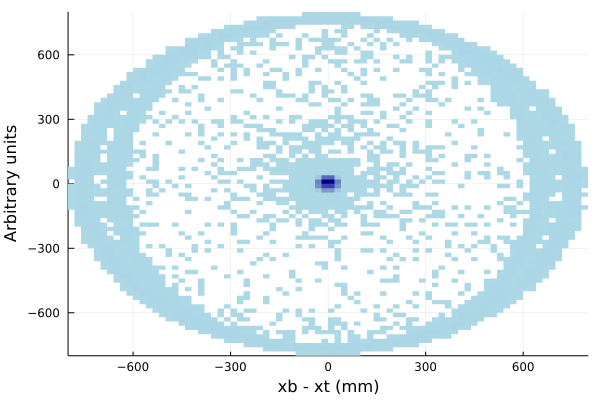

In [184]:
histogram2d(n3df.xb1 - n3df.xt1, n3df.yb1 - n3df.yt1, c=:blues, legend=false)
xlabel!("xb - xt (mm)")
ylabel!("Arbitrary units")

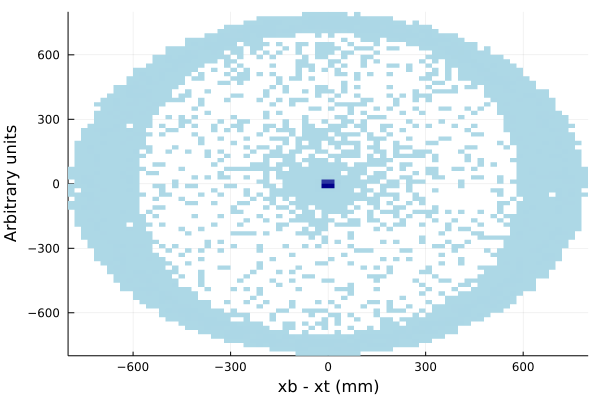

In [185]:
histogram2d(n3df.xr1 - n3df.xt1, n3df.yr1 - n3df.yt1, c=:blues, legend=false)
xlabel!("xb - xt (mm)")
ylabel!("Arbitrary units")

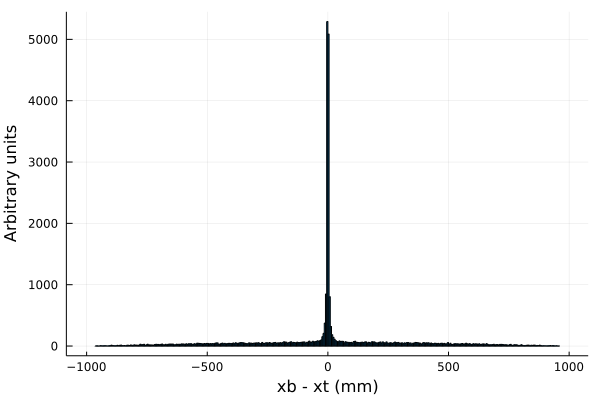

In [186]:
histogram(n3df.zb1 - n3df.zt1, legend=false)
xlabel!("xb - xt (mm)")
ylabel!("Arbitrary units")

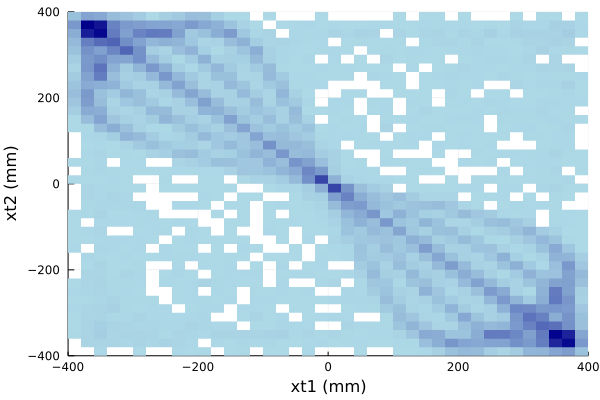

In [187]:
histogram2d(n3df.xt1, n3df.xt2, bin=50, c=:blues,legend=false)
xlabel!("xt1 (mm)")
ylabel!("xt2 (mm)")

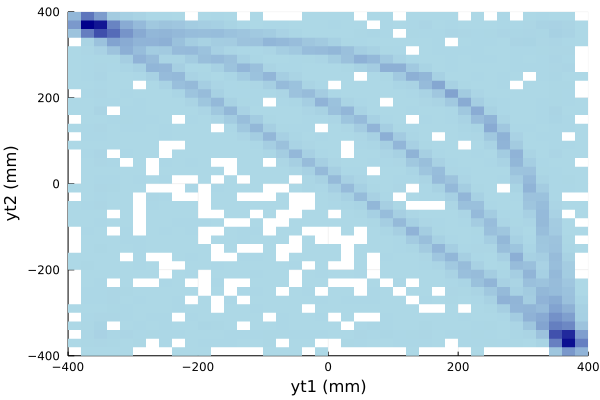

In [188]:
histogram2d(n3df.yt1, n3df.yt2, bin=50, c=:blues,legend=false)
xlabel!("yt1 (mm)")
ylabel!("yt2 (mm)")

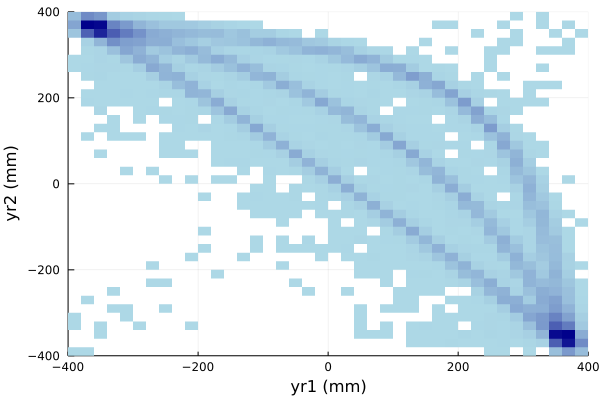

In [189]:
histogram2d(n3df.yr1, n3df.yr2, bin=50, c=:blues,legend=false)
xlabel!("yr1 (mm)")
ylabel!("yr2 (mm)")

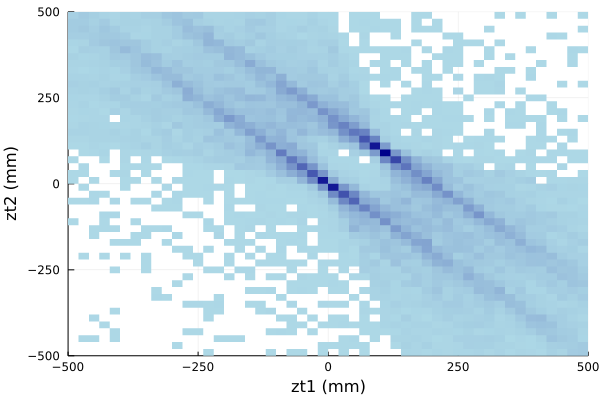

In [190]:
histogram2d(n3df.zt1, n3df.zt2, bin=50, c=:blues,legend=false)
xlabel!("zt1 (mm)")
ylabel!("zt2 (mm)")

In [191]:
input = string(drx,"/nema3df_f25_q10.csv")
n3df10 = DataFrame(CSV.File(input)) ;

In [192]:
n3pd = n3plt(n3df10);

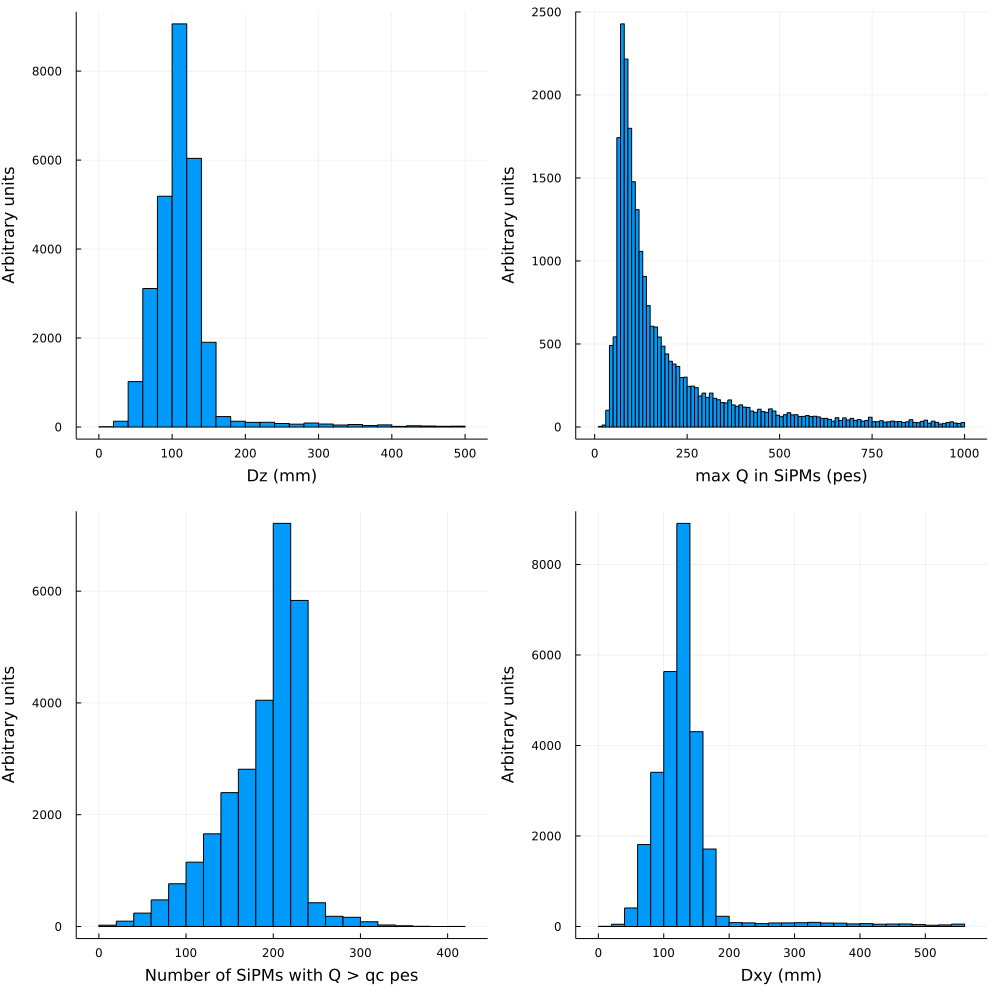

In [193]:
plot([n3pd[k] for k in keys(n3pd)]..., layout = (2, 2), size = (1000, 1000), 
     legend=false, fmt = :png)

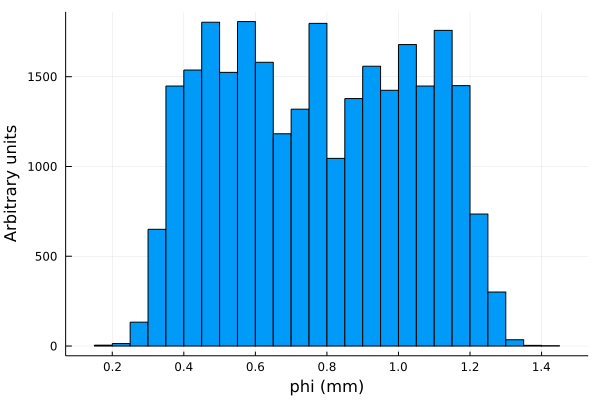

In [196]:
   dxy = histogram(phi(n3df.dx1,n3df.dy1), bins=40,legend=false)
    xlabel!("phi (mm)")
    ylabel!("Arbitrary units")
 